### 행정구역 정보를 읽고, 분석하기
* read_csv() 함수로 csv file 읽어오기
* 특정행과 열을 선택하기
* 컬럼명변경
* 상관관계 분석(인구수와 면적간의 상관관계)
* 시각화

In [5]:
import pandas as pd

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [6]:
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [7]:
data.sample(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
182,182,35397,장흥,2,22,617.96,전라남도,장흥군
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
137,137,288543,서울서대문,5,3,17.60,서울특별시,서대문구


In [8]:
print(data.shape)
print(data.columns)
print(data.index)

(229, 8)
Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
RangeIndex(start=0, stop=229, step=1)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [10]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [11]:
print('인구수 최대값 ',data['인구수'].max())
print('인구수 최소값 ',data['인구수'].min())
print('인구수 평균값 ',data['인구수'].mean())
print('인구수 표준편차값 ',data['인구수'].std())

인구수 최대값  1125461
인구수 최소값  8392
인구수 평균값  211089.77729257641
인구수 표준편차값  207437.8370475227


In [12]:
#unique한 광역시도명
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [13]:
#광역시도 값 row counting
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [14]:
#서울특별시에 속한 구에 대한 정보 선택하기
#입력으로 광역시도 이름을 받아서 광역시도에 속한 행정구역정보를 반환하는 함수 만들기

data.loc[data['광역시도'] == '서울특별시'].sort_values(by='인구수',ascending=False).reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,141,615487,서울송파,8,6,33.90,서울특별시,송파구
1,127,554709,서울강서,4,4,41.40,서울특별시,강서구
2,132,547202,서울노원,6,1,35.44,서울특별시,노원구
3,124,526157,서울강남,6,7,39.50,서울특별시,강남구
4,128,484478,서울관악,5,6,29.60,서울특별시,관악구
5,145,464236,서울은평,4,3,29.70,서울특별시,은평구
6,142,453634,서울양천,4,5,17.40,서울특별시,양천구
7,140,434061,서울성북,6,2,24.57,서울특별시,성북구
8,125,432028,서울강동,8,5,24.60,서울특별시,강동구
9,138,407416,서울서초,6,6,47.04,서울특별시,서초구


In [15]:
#서울특별시의 인구수의 평균과 표준편차

print('인구수 평균', data.loc[data['광역시도'] == '서울특별시','인구수'].mean())
print('인구수 표준편차',data.loc[data['광역시도'] == '서울특별시','인구수'].std())

인구수 평균 375792.28
인구수 표준편차 125231.24797500289


In [17]:
#경기도의 인구수의 평균과 표준편차를 출력하시오 (함수로 만들어서 출력하기)
#경기도와 서울특별시의 인구수의 표준편차가 어느지역이 더 큰가요? 표준편차가 더 크다면 어떤 의미인지 생각해보기

def print_mean_std(sido_name):
    print(f'광역시도 = {sido_name}')
    print('인구수 평균', data.loc[data['광역시도'] == sido_name,'인구수'].mean())
    print('인구수 표준편차',data.loc[data['광역시도'] == sido_name,'인구수'].std())

In [19]:
print_mean_std('경기도')

광역시도 = 경기도
인구수 평균 378845.48387096776
인구수 표준편차 304548.39514203876


In [22]:
for sido_name in data['광역시도'].unique():
    print_mean_std(sido_name)

광역시도 = 강원도
인구수 평균 79413.22222222222
인구수 표준편차 87316.38323837094
광역시도 = 경기도
인구수 평균 378845.48387096776
인구수 표준편차 304548.39514203876
광역시도 = 경상남도
인구수 평균 174693.72222222222
인구수 표준편차 245796.4650767224
광역시도 = 경상북도
인구수 평균 109085.39130434782
인구수 표준편차 124954.74088490057
광역시도 = 광주광역시
인구수 평균 287641.8
인구수 표준편차 137076.68320578814
광역시도 = 대구광역시
인구수 평균 297306.25
인구수 표준편차 174375.39437968715
광역시도 = 대전광역시
인구수 평균 293535.4
인구수 표준편차 111853.57188217103
광역시도 = 부산광역시
인구수 평균 207724.4375
인구수 표준편차 106246.04138380481
광역시도 = 서울특별시
인구수 평균 375792.28
인구수 표준편차 125231.24797500289
광역시도 = 세종특별자치시
인구수 평균 191233.0
인구수 표준편차 nan
광역시도 = 울산광역시
인구수 평균 221117.0
인구수 표준편차 64163.28658196991
광역시도 = 인천광역시
인구수 평균 276657.5
인구수 표준편차 199353.5964908417
광역시도 = 전라남도
인구수 평균 77298.31818181818
인구수 표준편차 74413.25322969875
광역시도 = 전라북도
인구수 평균 124217.71428571429
인구수 표준편차 168327.13482128442
광역시도 = 제주특별자치도
인구수 평균 287936.5
인구수 표준편차 201620.89205362622
광역시도 = 충청남도
인구수 평균 129741.93333333333
인구수 표준편차 141125.1080796583
광역시도 = 충청북도
인구수 평균 134974.54545454544
인구수

In [25]:
# 경상북도에 속한 행정구역의 행정구역, 인구수, 면적을 출력하고 인구수가 많은 순서대로 정렬하고 index를 순서대로 출력하기

data.loc[data['광역시도'] == '경상북도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,포항시,488395,1127.00
1,구미시,396685,616.10
2,경산시,251220,411.58
3,경주시,242618,1323.85
4,안동시,157317,1519.00
5,김천시,127941,1009.56
6,칠곡군,112446,451.00
7,영주시,101612,668.45
8,상주시,93305,1254.82
9,영천시,91214,919.76


In [29]:

# 인데스가 20부터 25까지, 컬럼명이 인구수부터 광역시도 까지
data.loc[20:25, '인구수':'광역시도']

,인구수,shortName,x,y,면적,광역시도
20,63227,과천,7,7,35.813,경기도
21,327111,광명,3,3,38.500,경기도
22,290210,광주,8,7,431.840,경기도
23,175676,구리,9,4,33.300,경기도
24,273302,군포,5,8,36.350,경기도
25,326523,김포,2,3,276.640,경기도


In [30]:
# iloc 사용하기
# 인덱스가 20부터 25까지, 컬럼인덱스가 1부터 4까지
data.iloc[20:25, 1:4]

,인구수,shortName,x
20,63227,과천,7
21,327111,광명,3
22,290210,광주,8
23,175676,구리,9
24,273302,군포,5


In [39]:
# 인구수가 전국평균 인구 수 보다 작은 지역을 선택하고, 결과를 엑셀로 저장하기
pop_mean_value = data['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')
data.loc[data['인구수'] < pop_mean_value, '인구수':'행정구역'].sort_values(by='인구수').reset_index(drop=True)
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value, '인구수':'행정구역'].sort_values(by='인구수').reset_index(drop=True)
pop_mean_lt_df.to_excel('data/평균인구수미만지역.xlsx')

211089.77729257641
211090
211089.78


In [49]:
# 컬럼명 변경
data = data.rename(columns={'Unnamed: 0':'seq'})

In [52]:
# seq 컬럼을 index로 변경하기
data = data.set_index('seq')

In [54]:
data.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [57]:
# 경기도에서 인구수가 가장 많은 행정구역은?
data.loc[data['광역시도'] == '경기도', ['행정구역', '인구수']].sort_values(by='인구수', ascending=False).head()

,행정구역,인구수
seq,,
30,수원시,1125461
19,고양시,955384
40,용인시,915005
29,성남시,911628
28,부천시,805473


In [59]:
pop_max_value = data.loc[data['광역시도'] == '경기도', '인구수'].max()
pop_max_value

1125461

In [61]:
# 광역시도가 경기도인 조건1, 인구수가 pop_max_value와 같은 조건2
data.loc[(data['광역시도'] == '경기도') & (data['인구수'] == pop_max_value)]

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
30,1125461,수원,6,9,121.09,경기도,수원시


In [63]:
# sido_name(광역시도)을 아규먼트 받아서, 특정 광역시도 중에서 가장 인구가 많은 행정구역을 반환하는 함수 정의하기
def get_pop_max_city(sido_name):
    pop_max_value = data.loc[data['광역시도'] == sido_name, '인구수'].max()
    print(pop_max_value)
    return data.loc[(data['광역시도'] == sido_name) & (data['인구수'] == pop_max_value)]

In [65]:
get_pop_max_city('전라북도')

630708


,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
198,630708,전주,3,16,206.45,전라북도,전주시


In [69]:
for sido_name in data['광역시도'].unique():
    print(type(get_pop_max_city(sido_name)))
    print(get_pop_max_city(sido_name))

313851
<class 'pandas.core.frame.DataFrame'>
313851
        인구수 shortName   x  y     면적 광역시도 행정구역
seq                                          
8    313851        원주  10  7  867.3  강원도  원주시
1125461
<class 'pandas.core.frame.DataFrame'>
1125461
         인구수 shortName  x  y      면적 광역시도 행정구역
seq                                           
30   1125461        수원  6  9  121.09  경기도  수원시
1010040
<class 'pandas.core.frame.DataFrame'>
1010040
         인구수 shortName  x   y      면적  광역시도 행정구역
seq                                             
61   1010040        창원  7  18  734.87  경상남도  창원시
488395
<class 'pandas.core.frame.DataFrame'>
488395
        인구수 shortName   x   y      면적  광역시도 행정구역
seq                                             
89   488395        포항  12  11  1127.0  경상북도  포항시
439683
<class 'pandas.core.frame.DataFrame'>
439683
        인구수 shortName  x   y      면적   광역시도 행정구역
seq                                             
93   439683      광주북구  3  19  121.74  광주광역시   북구
584517
<class 'p

In [71]:
# 새로운 DataFrame 객체생성
pop_max_city_df = pd.DataFrame(columns=['광역시도','행정구역','인구수'])
for sido_name in data['광역시도'].unique():
    pop_max_city_df = pop_max_city_df.append(get_pop_max_city(sido_name))

pop_max_city_df

313851
1125461
1010040
488395
439683
584517
475094
397134
615487
191233
327270
527153
263166
630708
430504
584912
790216


,광역시도,행정구역,인구수,shortName,x,y,면적
8,강원도,원주시,313851,원주,10.0,7.0,867.30
30,경기도,수원시,1125461,수원,6.0,9.0,121.09
61,경상남도,창원시,1010040,창원,7.0,18.0,734.87
89,경상북도,포항시,488395,포항,12.0,11.0,1127.00
93,광주광역시,북구,439683,광주북구,3.0,19.0,121.74
96,대구광역시,달서구,584517,대구달서,8.0,15.0,62.30
105,대전광역시,서구,475094,대전서구,4.0,14.0,95.25
123,부산광역시,해운대구,397134,부산해운대,12.0,17.0,51.44
141,서울특별시,송파구,615487,서울송파,8.0,6.0,33.90
149,세종특별자치시,세종시,191233,세종,4.0,11.0,465.23


#### 광역시도별로 인구수가 가장 많고, 면적이 가장 넓은 행정구역은?
* 1단계 - 광역시도별 면적이 가장 넓은 행정구역은?
    - 광역시도 | 행정구역 | 면적
* 2단계 - 광역시도별 인구수가 가장 많고, 면적이 가장 넓은 행정구역은?
    - 광역시도 | 행정구역 | 인구수 | 면적
* unique(), value_counts(), max() 함수 사용
* 사용자 정의 함수 선언하기
* 출력된 DataFrame의 index를 1부터 시작하기

#### 광역시도별로 인구수와 면적간의 상관계수 구하기?
    - 광역시도 | 상관계수

In [73]:
# 데이터 프레임의 인덱스를 1부터 시작하는 방법
print(len(pop_max_city_df))
# index 확인
pop_max_city_df.index

17


Int64Index([8, 30, 61, 89, 93, 96, 105, 123, 141, 149, 150, 160, 177, 198, 202,
            214, 227],
           dtype='int64')

In [75]:
import numpy as np

print(np.arange(1,10+1))
#index 변경
pop_max_city_df.index=np.arange(1,len(pop_max_city_df)+1)

[ 1  2  3  4  5  6  7  8  9 10]


In [78]:
print(pop_max_city_df.index)
pop_max_city_df

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')


,광역시도,행정구역,인구수,shortName,x,y,면적
1,강원도,원주시,313851,원주,10.0,7.0,867.30
2,경기도,수원시,1125461,수원,6.0,9.0,121.09
3,경상남도,창원시,1010040,창원,7.0,18.0,734.87
4,경상북도,포항시,488395,포항,12.0,11.0,1127.00
5,광주광역시,북구,439683,광주북구,3.0,19.0,121.74
6,대구광역시,달서구,584517,대구달서,8.0,15.0,62.30
7,대전광역시,서구,475094,대전서구,4.0,14.0,95.25
8,부산광역시,해운대구,397134,부산해운대,12.0,17.0,51.44
9,서울특별시,송파구,615487,서울송파,8.0,6.0,33.90
10,세종특별자치시,세종시,191233,세종,4.0,11.0,465.23


### 상관계수
* 인구수와 면적간에 관련성이 있는지 살펴보기 위해서 상관계수를 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울수록 관련성이 낮고, 1에 가까울수록 관련성이 높다
* 음수는 반비례(면적은 넓은 반면 인구수는 적은 경우), 양수는 비례(면적이 넓은데, 인구수도 많은 경우)
* corr() 함수 사용

In [80]:
# 전체행정구역의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

-0.3460351605045771

In [83]:
#서울특별시의 면적과 인구수의 상관계수 구하기

seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['면적'].corr(seoul_df['인구수'])

0.664426818890978

### Group By 기능
* 광역시도별 인구수의 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby() 함수는 컬럼의 값을 인자로 전달한다.
* DataFrame 객체의 groupby() 함수는 컬럼명을 인자로 전달한다.

In [87]:
# Series vs DataFrame

print(type(data['광역시도']))
print(type(data[['광역시도','행정구역']]))

# 컬럼 1 선택
data[['광역시도','행정구역']].head(2)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,광역시도,행정구역
seq,,
0,강원도,강릉시
1,강원도,고성군


In [90]:
# 행 1개 선택
print(type(data[0:1]))
data[0:1]

<class 'pandas.core.frame.DataFrame'>


,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시


In [93]:
# 행 2개, 모든 열 선택
print(type(data.loc[0:1]))
data.loc[0:1]

<class 'pandas.core.frame.DataFrame'>


,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


In [96]:
# Series 객체 사용 - 광역시도별 인구수의 합계
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [100]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계
# DataFrameGroupBy object
data.groupby('광역시도').sum()

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [102]:
# DataFrameGroupBy object
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [104]:
# 광역시도별, 행정구역별 인구수의 합계
groupby_df = data.groupby(['광역시도', '행정구역'])['인구수'].sum()
groupby_df.to_excel('data/광역시도별_행정구역별_인구수 합계.xlsx',sheet_name='인구수')

#### 엑셀 수치데이터에 콤마찍기

In [106]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
groupby_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

#### 광역시도별 인구수의 max, mean, std 집계함수를 한꺼번에 조회하기
* DataFrame의 agg()함수 사용하기

In [109]:
data.groupby('광역시도')['인구수'].agg(['max','mean','std'])

data.loc[data['광역시도'] == '세종특별자치시']

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
149,191233,세종,4,11,465.23,세종특별자치시,세종시


In [126]:
#fillna(0) : NaN 값을 0으로 채워주기
#sort_values(by='std',ascending=False) : 표준편차가 높은 순서대로 정렬
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0).sort_values(by='std',ascending=False)
group_agg_df.head(2)

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077


In [127]:
group_agg_df.style.format('{0:.2f}')

,max,mean,std
광역시도,,,
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
충청북도,790216.00,134974.55,223460.36
제주특별자치도,430504.00,287936.50,201620.89
인천광역시,527153.00,276657.50,199353.60
대구광역시,584517.00,297306.25,174375.39
전라북도,630708.00,124217.71,168327.13
충청남도,584912.00,129741.93,141125.11
광주광역시,439683.00,287641.80,137076.68


In [128]:
#inplace속성의 default=False
#변경된 결과를 화면에 출력만 하고 원본 DataFrame을 수정하지는 않음
group_agg_df.reset_index(level='광역시도', inplace=False)

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,304548.395142
1,경상남도,1010040,174693.722222,245796.465077
2,충청북도,790216,134974.545455,223460.356657
3,제주특별자치도,430504,287936.500000,201620.892054
4,인천광역시,527153,276657.500000,199353.596491
5,대구광역시,584517,297306.250000,174375.394380
6,전라북도,630708,124217.714286,168327.134821
7,충청남도,584912,129741.933333,141125.108080
8,광주광역시,439683,287641.800000,137076.683206
9,서울특별시,615487,375792.280000,125231.247975


In [129]:
# inplace 속성의 default = False
# inplace = True 이면 변경된  결과를  화면에 출력하지 않고, 원본 DataFrame을 수정한다.

group_agg_df.reset_index(level='광역시도', inplace = True)

In [130]:
group_agg_df.head(3)

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,304548.395142
1,경상남도,1010040,174693.722222,245796.465077
2,충청북도,790216,134974.545455,223460.356657


#### 시각화
* plot이 출력되려면 show() 함수를 호출을 해야 하지만, juypter 에서는 show() 함수를 호출하지 않아도 된다.
* %matplotlib inline 설정을 해주어야 한다.
* 한글폰토 설정이 필요함
* plot에 대한 설정은 matplotlib의 함수들을 사용하고, plot을 그려주는 기능은 seaborn의 함수들을 사용한다.

In [132]:
%matplotlib inline

In [135]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.4.3
seaborn  0.11.2


In [138]:
# 폰트이름과 폰트파일 정보 출력 : list comprehension
# Mac은 if 'Ap' in font.name
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Ma' in font.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Matura MT Script Capitals', 'C:\\Windows\\Fonts\\MATURASC.TTF'),
 ('Maiandra GD', 'C:\\WINDOWS\\Fonts\\MAIAN.TTF'),
 ('Matura MT Script Capitals', 'C:\\WINDOWS\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Magneto', 'C:\\WINDOWS\\Fonts\\MAGNETOB.TTF'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgun.ttf'),
 ('Marlett', 'C:\\WINDOWS\\Fonts\\marlett.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Magic R', 'C:\\WINDOWS\\Fonts\\hmkmmag.ttf'),
 ('Magneto', 'C:\\Windows\\Fonts\\MAGNETOB.TTF'),
 ('Magic R', 'C:\\Windows\\Fonts\\hmkmmag.ttf'),
 ('Maiandra GD', 'C:\\Windows\\Fonts\\MAIAN.TTF')]

In [140]:
#한글폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

# font의 파일정보로 font name을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

# matplotlib의 rc(run command) 함수를 사용해서 폰트이름 설정
matplotlib.rc('font', family=font_prop)

Malgun Gothic


#### Figure, Axes
* Figure는 Plot이 그려지는 도화지
* Axes는 Plot의 그려지는 공간
* Figure에 Axes를 여러개 생성해서 Figure를 분할해서 Plot을 그릴 수 있음
* seaborn()에서 제공하는 막대그래프를 그릴 수 있는 barplot() 함수 사용

In [142]:
seoul_df.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,310292,서울강북,5,2,23.6,서울특별시,강북구
127,554709,서울강서,4,4,41.4,서울특별시,강서구
128,484478,서울관악,5,6,29.6,서울특별시,관악구


Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


<AxesSubplot:xlabel='행정구역', ylabel='면적'>

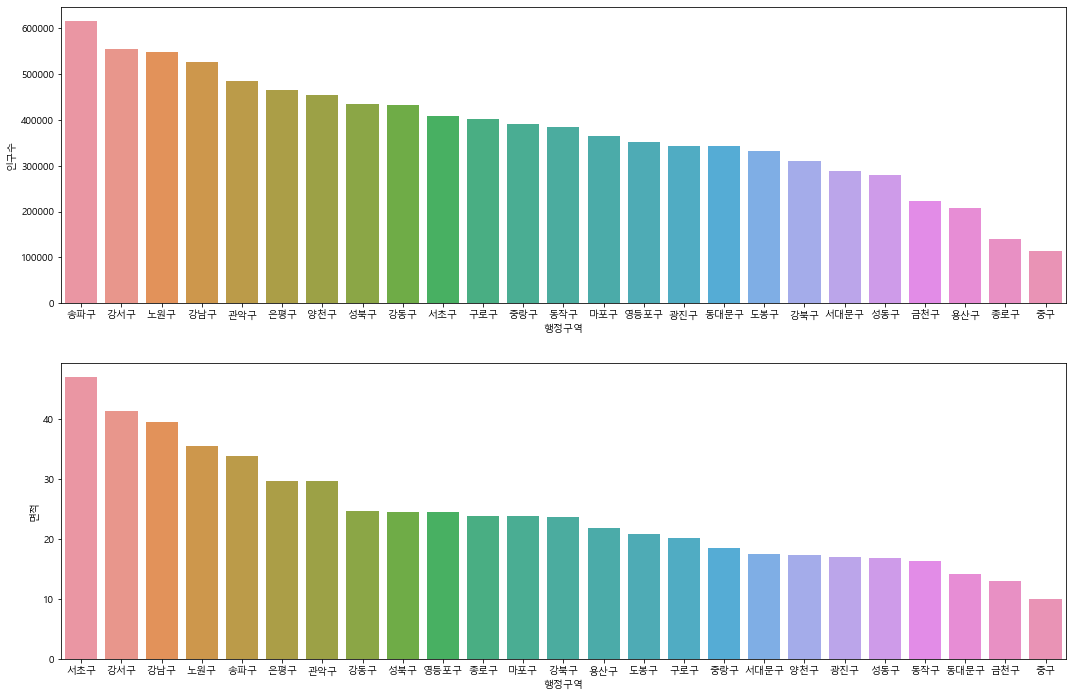

In [144]:
figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)
sns.barplot(x='행정구역', y='인구수', data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
sns.barplot(x='행정구역', y='면적', data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)

In [148]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 보여주는 barplot를 그려주는 함수 정의하기

def print_barplot(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    figure,(axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정구역', y='면적', data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)
    area_plot.set_title(f'{sido_name} 행정구역별 면적')

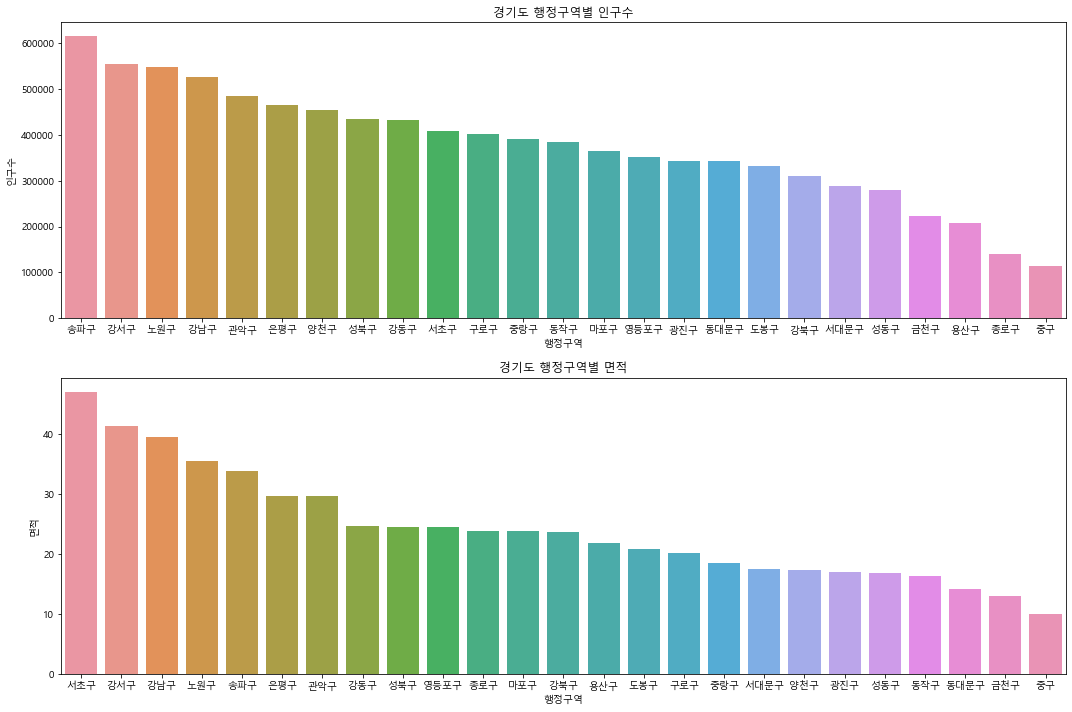

In [150]:
print_barplot('경기도')

<AxesSubplot:xlabel='광역시도', ylabel='인구수'>

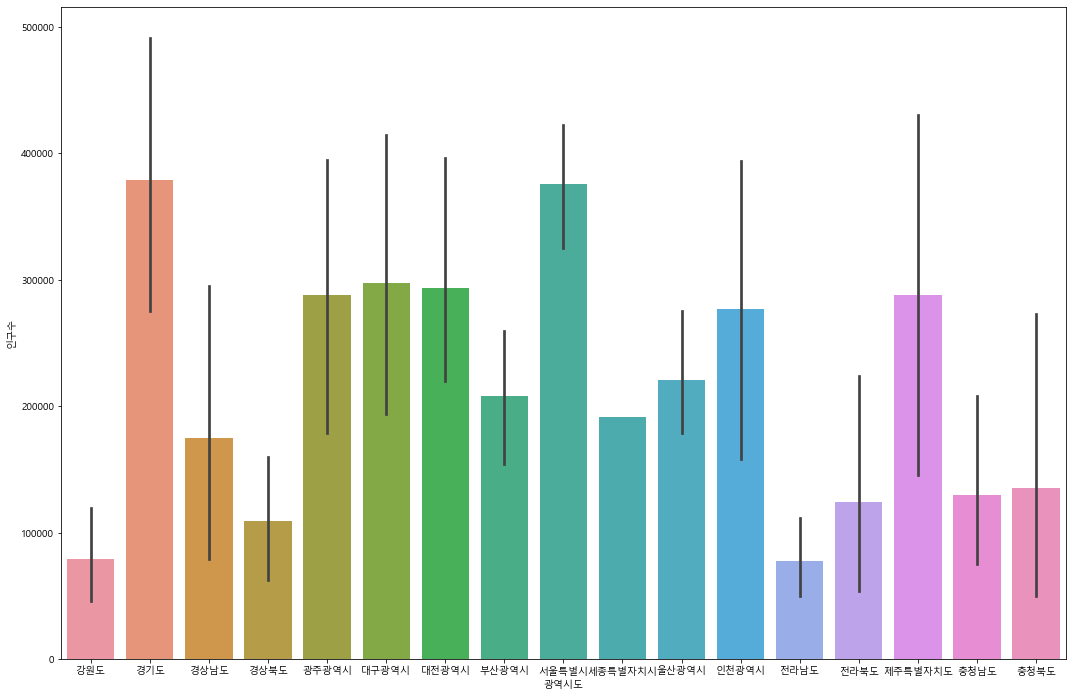

In [153]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(x='광역시도', y='인구수', data=data, ax=axes1)

In [155]:
for i, v in enumerate(seoul_df["인구수"].iteritems()):
    print(i, v[0],v[1])

0 124 526157
1 125 432028
2 126 310292
3 127 554709
4 128 484478
5 129 342909
6 130 401233
7 131 222566
8 132 547202
9 133 331682
10 134 342429
11 135 383917
12 136 364232
13 137 288543
14 138 407416
15 139 279939
16 140 434061
17 141 615487
18 142 453634
19 143 351837
20 144 208603
21 145 464236
22 146 140595
23 147 114967
24 148 391655


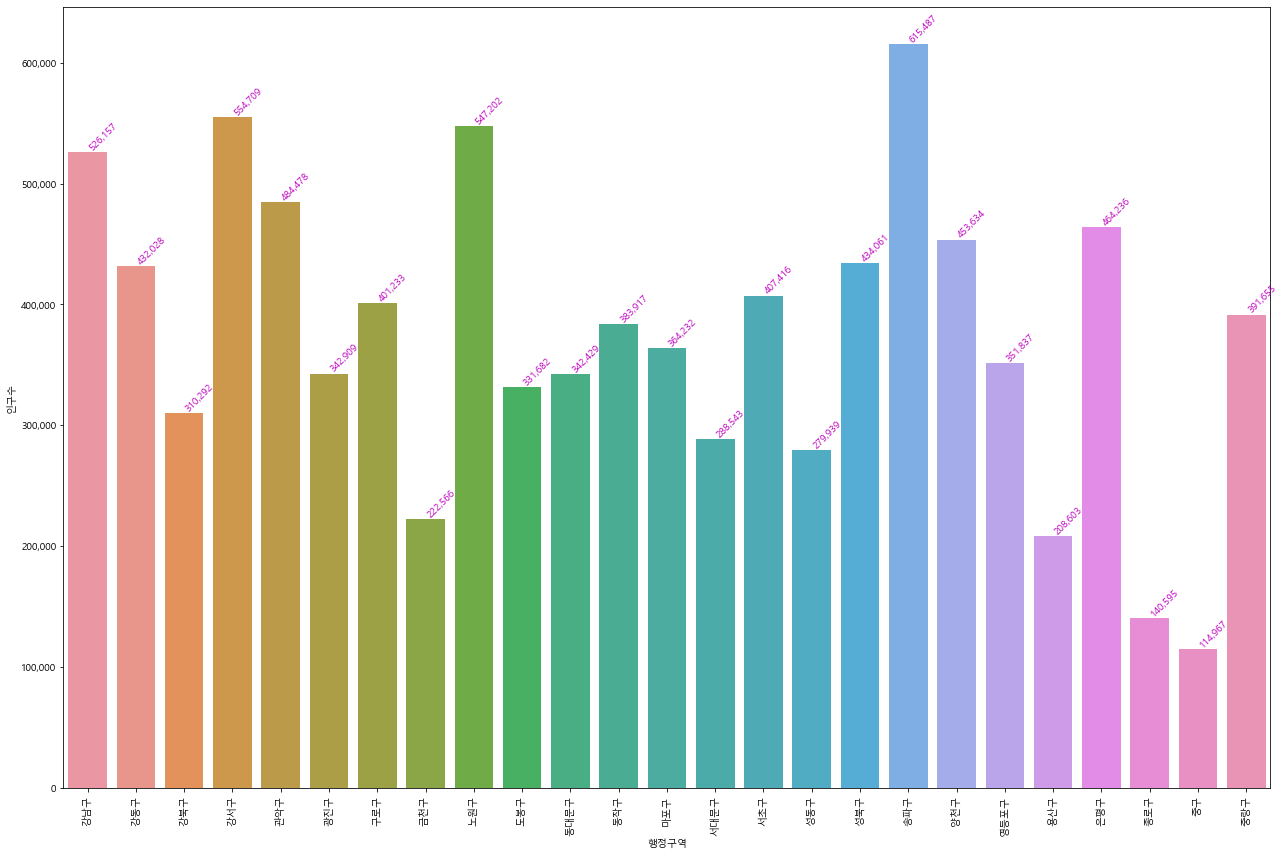

In [156]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax1.set(ylabel='인구수')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
for i, v in enumerate(seoul_df["인구수"].iteritems()):
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()